# State Detection Visualization
In this notebook, we visualize predicted state detections for an example time series.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import sys

sys.path.append("../../")

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

from src.utils import load_tssb_datasets, load_has_datasets, load_datasets
import seaborn as sns

from src.visualization import plot_state_detection

sns.set_theme()
sns.set_color_codes()

We start by loading a data set and the competitor results.

In [3]:
dataset = "HAS"
competitor = "CLaP"

In [4]:
if dataset == "TSSB":
    df_data = load_tssb_datasets()
elif dataset == "HAS":
    df_data = load_has_datasets()
else:
    df_data = load_datasets(dataset)

df_data

,dataset,window_size,change_points,labels,time_series
0,indoor_subject1_routine1 (id125),50,"[1461, 2952, 4473, 5022, 6460]","[1, 0, 1, 2, 0, 3]","[[0.406, -0.4804, 1.775, -0.2425, 1.2022, -0.0..."
1,indoor_subject1_routine1 (id140),50,"[772, 2056, 3521, 4835, 5283, 6893]","[2, 1, 3, 1, 2, 0, 3]","[[-0.2274, 0.5969, -0.5992, -0.159557142857142..."
2,indoor_subject1_routine1 (id93),50,"[1211, 2043, 2836, 3529, 4036]","[2, 4, 0, 1, 3, 4]","[[4.8883, 5.4784, -6.4445, 0.06082307692307692..."
3,indoor_subject1_routine1 (id52),50,"[739, 1433, 2044, 2875, 3589]","[0, 1, 2, 3, 1, 0]","[[-1.2656, -0.5253, -3.9209, -0.47177142857142..."
4,indoor_subject1_routine1 (id221),50,"[1506, 3033, 4477, 5348, 6805]","[2, 0, 2, 3, 0, 1]","[[-0.8136, -0.1392, 0.844, -0.654675, -0.02139..."
5,indoor_subject1_routine1 (id150),50,"[1458, 1887]","[1, 2, 0]","[[3.7652, 1.056, 2.9724, -0.879, 0.1979, -0.03..."
6,indoor_subject2_routine1 (id176),50,"[1431, 1746, 3498, 5240, 6390]","[1, 2, 0, 1, 2, 0]","[[0.8414, -0.4101, 2.9656, -1.1301, -1.8644, 0..."
7,indoor_subject2_routine1 (id231),50,"[1605, 2846, 4136, 5300]","[2, 1, 2, 1, 0]","[[0.0236, -0.7341, -0.6532, -0.043445, -0.0283..."
8,indoor_subject2_routine1 (id103),50,"[1239, 2342, 3513, 3885]","[3, 1, 4, 2, 0]","[[3.5014, 9.5422, 0.8233, -0.04700999999999999..."
9,indoor_subject2_routine1 (id66),50,"[816, 2102, 2795, 3416, 4024, 5190]","[1, 3, 0, 1, 2, 3, 1]","[[0.5602, 0.8112, 1.5514, 0.5205, -0.5253, -0...."


In [5]:
np_cols = ["true_cps", "found_cps", "found_labels"]

converters = {
    col: lambda val: np.array([]) if len(val) == 0 else np.array(eval(val)) for col
    in np_cols}

df_scores = pd.read_csv(f"../../experiments/state_detection/{dataset}_{competitor}.csv.gz", converters=converters)
df_scores.sort_values(by="ami_score", ascending=False)

,dataset,true_cps,found_cps,found_labels,f1_score,covering_score,ami_score,runtime
100,indoor_subject8_routine3 (id242),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.062254
118,outdoor_subject2_routine1 (id168),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.040757
222,outdoor_subject6_routine3 (id172),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.033709
95,indoor_subject7_routine3 (id188),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.041894
102,indoor_subject8_routine3 (id240),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.073602
221,outdoor_subject6_routine3 (id191),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.035427
234,outdoor_subject7_routine3 (id219),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.036463
235,outdoor_subject7_routine3 (id4),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.038046
213,outdoor_subject5_routine3 (id126),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.029443
236,outdoor_subject7_routine3 (id79),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,0.044731


Now, we plot the state detection for a given time series.

<Axes: >

<Figure size 640x480 with 0 Axes>

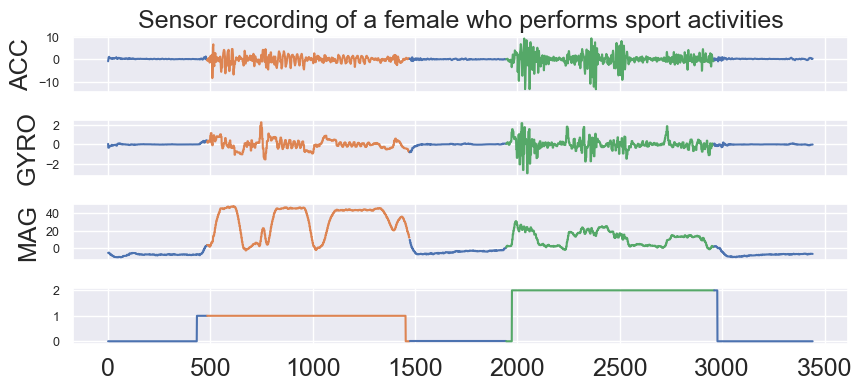

In [6]:
idx = 103
data_row = df_data.iloc[idx]

plot_state_detection("Sensor recording of a female who performs sport activities", data_row.time_series[:, [0, 3, 6]],
                     df_scores.iloc[idx].found_labels, change_points=data_row.change_points, labels=data_row.labels,
                     ylabels=("ACC", "GYRO", "MAG"), file_path="../../tmp/state_visualization.pdf")